In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

___

# Reading in Data

In [174]:
microgrowery = pd.read_csv('microgrowery.csv')

C:\Users\Anonymous\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (76,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [175]:
microgrowery.head()

,index,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,secure_media_embed,removed_by_category,author_flair_background_color,author_flair_text_color,author_flair_template_id,author_cakeday,edited,poll_data,banned_by,distinguished
0,0,[],False,ChillyFarm42,NaN,[],NaN,text,t2_6n1akicd,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,burittoman,NaN,[],NaN,text,t2_a13nsqj6,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,SnooLobsters6695,NaN,[],NaN,text,t2_7sh0se1w,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,UkFirstTimer94,NaN,[],NaN,text,t2_87yp7gwm,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,horseygrow,NaN,[],NaN,text,t2_75kcd79l,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
sandwiches = pd.read_csv('sandwiches.csv')

In [177]:
sandwiches.head()

,index,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,og_title,gilded,rte_mode,author_id,brand_safe,suggested_sort,approved_at_utc,banned_at_utc,view_count,author_created_utc
0,0,[],False,IntlMan902102020,NaN,[],NaN,text,t2_521yfhp7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,Boknowsnada,NaN,[],NaN,text,t2_17xvgq7f,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,jayatisinghal,NaN,[],NaN,text,t2_1x82nxie,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,geodog242,NaN,[],NaN,text,t2_4jx9sk3g,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Simp4skin,NaN,[],NaN,text,t2_a124xnfu,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___

# Cleaning

In [178]:
#I'm only going to be using 'selftext' and 'title' columns

microgrowery = microgrowery[['title', 'selftext']]

In [179]:
sandwiches = sandwiches[['title', 'selftext']]

In [180]:
#Removing NAs

microgrowery['selftext'].fillna('', inplace = True)

In [181]:
sandwiches['selftext'].fillna('', inplace = True)

In [182]:
#Let's see if anything else glaring needs to be removed

microgrowery['selftext'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            7830
[deleted]                                                                                                                                                                                                                                                                                                                                                                                              

In [183]:
#[deleted] and [removed] need to be removed

microgrowery['selftext'] = microgrowery['selftext'].replace(['[removed]', '[deleted]'], '')

In [184]:
sandwiches['selftext'] = sandwiches['selftext'].replace(['[removed]', '[deleted]'], '')

In [185]:
#Let's look at the title column

microgrowery['title'].value_counts()

#This looks fine

The sampler (update)                                                                                                                                                                                                                                                                                            13
Grafted Freakshow, Hop and others on White Widow mother update                                                                                                                                                                                                                                                   8
Weird Mutation? Comments for more info                                                                                                                                                                                                                                                                           7
Grafted Freakshow, Hop and others on White Widow update                        

In [186]:
sandwiches['title'].value_counts()

#Looks good here too

Sandwich                                                                                                                                                                                                                                            11
BLTA with t h i c c cut homemade hickory-smoked bacon and brown sugar mustard sauce                                                                                                                                                                  9
Double stacked "BLT(T)" (bacon, lettuce, tomato &amp; turkey) with deli-fresh honey roasted turkey breast, spicy southwestern-style turkey breast, hickory bacon, lettuce and tomato on a toasted brioche bun; w/ a homemade spicy chipotle mayo     7
Pokemon Go Hack Android/iOS 🔥 Pokemon Go Spoofing Joystick GPS &amp; Telepor...                                                                                                                                                                      4
Muffuletta f

In [187]:
#I'm gonna add a column that says what reddit the row comes from

microgrowery['from'] = 'microgrowery'

In [188]:
sandwiches['from'] = 'sandwiches'

In [189]:
microgrowery.head()

,title,selftext,from
0,Day 13 of flower starting too get a nice stret...,,microgrowery
1,"15 days since it emerged, 18h LED lights per d...",,microgrowery
2,"First post ever, 3th grow: coco, LED, automati...",,microgrowery
3,How long do people think I have left before ch...,,microgrowery
4,What is happening to my little babes? It sprea...,,microgrowery


In [190]:
sandwiches.head()

,title,selftext,from
0,Spicy chicken parm sliders w/ a side of grapev...,,sandwiches
1,Egg salad and ham. Reminds me of thanksgiving,,sandwiches
2,Homemade Potato Smiley | Potato Smiley | Eveni...,,sandwiches
3,"Pimento cheese dip, sausage and egg breakfast ...",,sandwiches
4,Chicago style sandwich.,,sandwiches


In [191]:
#Since there are so many missing 'selftext', I'm going to combine them with the title

microgrowery['text'] = microgrowery['title'] + ' ' + microgrowery['selftext']

In [192]:
sandwiches['text'] = sandwiches['title'] + ' ' + sandwiches['selftext']

In [193]:
microgrowery.head()

,title,selftext,from,text
0,Day 13 of flower starting too get a nice stret...,,microgrowery,Day 13 of flower starting too get a nice stret...
1,"15 days since it emerged, 18h LED lights per d...",,microgrowery,"15 days since it emerged, 18h LED lights per d..."
2,"First post ever, 3th grow: coco, LED, automati...",,microgrowery,"First post ever, 3th grow: coco, LED, automati..."
3,How long do people think I have left before ch...,,microgrowery,How long do people think I have left before ch...
4,What is happening to my little babes? It sprea...,,microgrowery,What is happening to my little babes? It sprea...


In [194]:
sandwiches.head()

,title,selftext,from,text
0,Spicy chicken parm sliders w/ a side of grapev...,,sandwiches,Spicy chicken parm sliders w/ a side of grapev...
1,Egg salad and ham. Reminds me of thanksgiving,,sandwiches,Egg salad and ham. Reminds me of thanksgiving
2,Homemade Potato Smiley | Potato Smiley | Eveni...,,sandwiches,Homemade Potato Smiley | Potato Smiley | Eveni...
3,"Pimento cheese dip, sausage and egg breakfast ...",,sandwiches,"Pimento cheese dip, sausage and egg breakfast ..."
4,Chicago style sandwich.,,sandwiches,Chicago style sandwich.


In [195]:
#I'm going to lowercase everything in the text field

microgrowery['text'] = [text.lower() for text in microgrowery['text']]

In [196]:
sandwiches['text'] = [text.lower() for text in sandwiches['text']]

In [197]:
microgrowery.head()

,title,selftext,from,text
0,Day 13 of flower starting too get a nice stret...,,microgrowery,day 13 of flower starting too get a nice stret...
1,"15 days since it emerged, 18h LED lights per d...",,microgrowery,"15 days since it emerged, 18h led lights per d..."
2,"First post ever, 3th grow: coco, LED, automati...",,microgrowery,"first post ever, 3th grow: coco, led, automati..."
3,How long do people think I have left before ch...,,microgrowery,how long do people think i have left before ch...
4,What is happening to my little babes? It sprea...,,microgrowery,what is happening to my little babes? it sprea...


In [198]:
sandwiches.head()

,title,selftext,from,text
0,Spicy chicken parm sliders w/ a side of grapev...,,sandwiches,spicy chicken parm sliders w/ a side of grapev...
1,Egg salad and ham. Reminds me of thanksgiving,,sandwiches,egg salad and ham. reminds me of thanksgiving
2,Homemade Potato Smiley | Potato Smiley | Eveni...,,sandwiches,homemade potato smiley | potato smiley | eveni...
3,"Pimento cheese dip, sausage and egg breakfast ...",,sandwiches,"pimento cheese dip, sausage and egg breakfast ..."
4,Chicago style sandwich.,,sandwiches,chicago style sandwich.


In [199]:
#I'm going to remove all the punctuation amd everything that isn't character or space

microgrowery['text'] = [re.sub(pattern = '[^\w\s]', repl =  '', string = box) for box in microgrowery['text']]

In [200]:
sandwiches['text'] = [re.sub(pattern = '[^\w\s]', repl =  '', string = box) for box in sandwiches['text']]

In [201]:
#I'm going to remove the numbers

microgrowery['text'] = [re.sub(pattern = '\d+', repl =  '', string = box) for box in microgrowery['text']]

In [202]:
sandwiches['text'] = [re.sub(pattern = '\d+', repl =  '', string = box) for box in sandwiches['text']]

In [203]:
#Removing non english characters
#Source : https://datascience.stackexchange.com/questions/46705/to-remove-chinese-characters-as-features


microgrowery['text'] = [re.sub(pattern = "([^\x00-\x7F])+", repl = " ", string = box) for box in microgrowery['text']]

In [204]:
sandwiches['text'] = [re.sub(pattern = "([^\x00-\x7F])+", repl = " ", string = box) for box in sandwiches['text']]

In [205]:
microgrowery.head()

,title,selftext,from,text
0,Day 13 of flower starting too get a nice stret...,,microgrowery,day of flower starting too get a nice stretch...
1,"15 days since it emerged, 18h LED lights per d...",,microgrowery,days since it emerged h led lights per dayfox...
2,"First post ever, 3th grow: coco, LED, automati...",,microgrowery,first post ever th grow coco led automatic fer...
3,How long do people think I have left before ch...,,microgrowery,how long do people think i have left before ch...
4,What is happening to my little babes? It sprea...,,microgrowery,what is happening to my little babes it spread...


-----

### Lemmatizing

In [206]:
#Source: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

#Instantiating lemmatizer

lemmatize = WordNetLemmatizer()

In [207]:
#For microgrowery 

lemontized = []
for box in microgrowery['text']:
    lemontized.append(' '.join([lemmatize.lemmatize(word) for word in box.split()]))

In [208]:
microgrowery['text'] = lemontized

In [209]:
microgrowery.head()

,title,selftext,from,text
0,Day 13 of flower starting too get a nice stret...,,microgrowery,day of flower starting too get a nice stretch ...
1,"15 days since it emerged, 18h LED lights per d...",,microgrowery,day since it emerged h led light per dayfoxfar...
2,"First post ever, 3th grow: coco, LED, automati...",,microgrowery,first post ever th grow coco led automatic fer...
3,How long do people think I have left before ch...,,microgrowery,how long do people think i have left before ch...
4,What is happening to my little babes? It sprea...,,microgrowery,what is happening to my little babe it spread ...


In [210]:
#For sandwiches

lemontized = []
for box in sandwiches['text']:
    lemontized.append(' '.join([lemmatize.lemmatize(word) for word in box.split()]))

In [211]:
sandwiches['text'] = lemontized

In [212]:
sandwiches.head()

,title,selftext,from,text
0,Spicy chicken parm sliders w/ a side of grapev...,,sandwiches,spicy chicken parm slider w a side of grapevin...
1,Egg salad and ham. Reminds me of thanksgiving,,sandwiches,egg salad and ham reminds me of thanksgiving
2,Homemade Potato Smiley | Potato Smiley | Eveni...,,sandwiches,homemade potato smiley potato smiley evening s...
3,"Pimento cheese dip, sausage and egg breakfast ...",,sandwiches,pimento cheese dip sausage and egg breakfast s...
4,Chicago style sandwich.,,sandwiches,chicago style sandwich


---

## Adding word count columns to each dataframe

In [213]:
#Word count distribution

microgrowery['word_count'] = [len(box.split()) for box in microgrowery['text']]

In [214]:
sandwiches['word_count'] = [len(box.split()) for box in sandwiches['text']]

### Empty cell check

In [215]:
#Removing any rows that have 0 words

microgrowery = microgrowery[microgrowery['word_count'] != 0]

In [216]:
sandwiches = sandwiches[sandwiches['word_count'] != 0]

---

### Taking 5000 rows from each

In [217]:
microgrowery = microgrowery[ : 5000]

In [218]:
sandwiches = sandwiches[ : 5000]

---

## Combinging the two subreddits

In [219]:
#Merging the data

merged = microgrowery.append(sandwiches)

In [220]:
merged.head()

,title,selftext,from,text,word_count
0,Day 13 of flower starting too get a nice stret...,,microgrowery,day of flower starting too get a nice stretch ...,11
1,"15 days since it emerged, 18h LED lights per d...",,microgrowery,day since it emerged h led light per dayfoxfar...,20
2,"First post ever, 3th grow: coco, LED, automati...",,microgrowery,first post ever th grow coco led automatic fer...,32
3,How long do people think I have left before ch...,,microgrowery,how long do people think i have left before ch...,45
4,What is happening to my little babes? It sprea...,,microgrowery,what is happening to my little babe it spread ...,14


## Countvectorizeing the data

In [221]:
#Instantiating CountVectorizer with english stop words

countvecula = CountVectorizer(stop_words = 'english')

In [222]:
#Fitting and transforming the merged['text'] columns

word_matrix = countvecula.fit_transform(merged['text'])

In [223]:
#Creating dataframe of vectorized data

vectorized = pd.DataFrame(word_matrix.toarray(), columns = countvecula.get_feature_names())

In [224]:
vectorized

,aaaaaaaaaa,aampb,aardvark,aarhus,ab,abandoned,abc,ability,abit,able,...,zone,zookies,zoom,zoomed,zour,zskittles,zucchini,zukes,zymes,zywiecka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
#Adding back the 'from' column from the merged dataframe so I can use it as the target variable
#during modeling

vectorized['from_sub'] = [box for box in merged['from']]

In [226]:
#Save vectorized data to csv

vectorized.to_csv('data/vectorized.csv', index = False)

In [227]:
#Save individual dataframes

microgrowery.to_csv('data/microgrowery_cleaned.csv')

sandwiches.to_csv('data/sandwiches_cleaned.csv')

# EDA

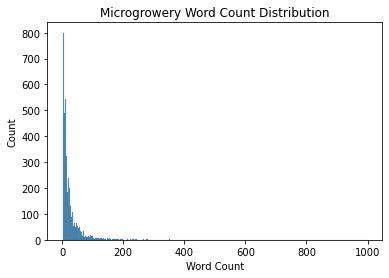

In [228]:
sns.histplot(microgrowery['word_count'])
plt.title('Microgrowery Word Count Distribution')
plt.xlabel('Word Count');

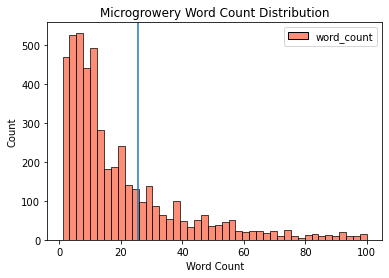

In [229]:
#Going to narrow it down to <100 to get a better visual

sns.histplot(microgrowery[microgrowery['word_count'] <= 100], palette = 'Reds').axvline(microgrowery['word_count'].mean())
plt.title('Microgrowery Word Count Distribution')
plt.xlabel('Word Count');
plt.savefig('images/mg_wc.jpg')

The distirubtion is heavily skewed to the right, which makes sense because people probably don't want to write a lot.

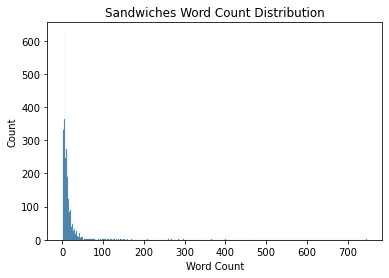

In [230]:
sns.histplot(sandwiches['word_count'])
plt.title('Sandwiches Word Count Distribution')
plt.xlabel('Word Count');

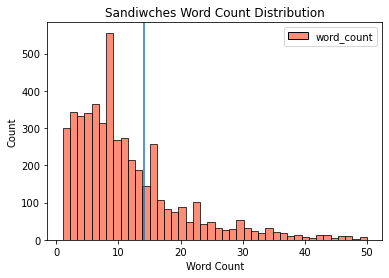

In [231]:
#Going to narrow it down to <500to get a better visual

sns.histplot(sandwiches[sandwiches['word_count'] <= 50], palette = 'Reds').axvline(sandwiches['word_count'].mean())
plt.title('Sandiwches Word Count Distribution')
plt.xlabel('Word Count');
plt.savefig('images/sw_wc.jpg')

The distirubtion here is also heavily skewed to the right, which makes sense because people probably don't want to write a lot.

In [232]:
#Average word count per group

microgrowery['word_count'].mean()

25.5914

In [233]:
sandwiches['word_count'].mean()

14.1084

The average word count of the microgrowery subreddit is singificantly higher than that of the sandwiches subreddit. This could be because microgrowery may require more words to talk about than sandwiches.

In [234]:
#Let's look at the summary statistics for the word counts

microgrowery['word_count'].describe()

count    5000.000000
mean       25.591400
std        40.392068
min         1.000000
25%         6.000000
50%        13.000000
75%        28.000000
max       998.000000
Name: word_count, dtype: float64

In [235]:
sandwiches['word_count'].describe()

count    5000.0000
mean       14.1084
std        23.9459
min         1.0000
25%         5.0000
50%         9.0000
75%        15.0000
max       747.0000
Name: word_count, dtype: float64

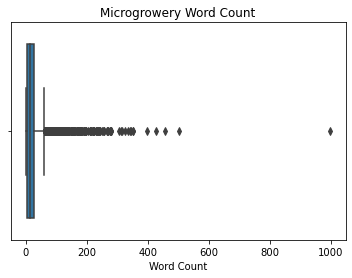

In [236]:
#I'm going to make a boxplot to better understand the outliers for each subreddit

sns.boxplot(x = microgrowery['word_count'])
plt.title('Microgrowery Word Count')
plt.xlabel('Word Count');

#There is one outlier that is significantly farther than the others

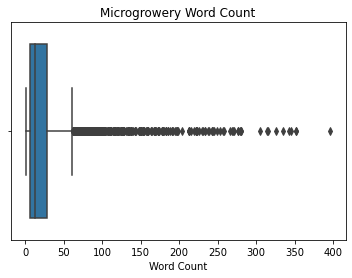

In [237]:
sns.boxplot(x = microgrowery[microgrowery['word_count'] < 400]['word_count'])
plt.title('Microgrowery Word Count')
plt.xlabel('Word Count');
#Looks like everything past about 50 or so words is an outlier

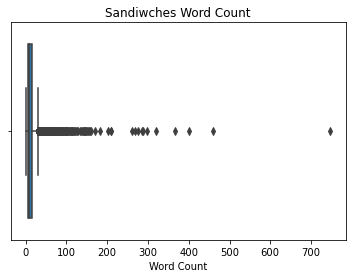

In [238]:
#Let's look at sandwiches

sns.boxplot(x = sandwiches['word_count'])
plt.title('Sandiwches Word Count')
plt.xlabel('Word Count');

#Same problem here

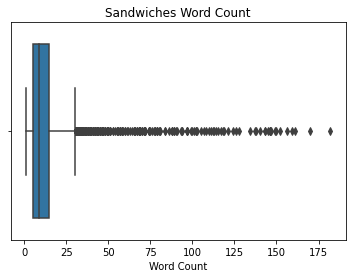

In [239]:
#Here, the outlier threshold is lower than for microgrowery at about 25 words

sns.boxplot(x = sandwiches[sandwiches['word_count'] < 200]['word_count'])
plt.title('Sandwiches Word Count')
plt.xlabel('Word Count');

## Top words analysis

In [240]:
microgrowery_vector = vectorized[vectorized['from_sub'] == 'microgrowery']

In [241]:
sandwiches_vector = vectorized[vectorized['from_sub'] == 'sandwiches']

In [242]:
word_counts_microgrowery = pd.DataFrame(microgrowery_vector.drop(columns = 'from_sub').sum())

In [243]:
word_counts_sandwiches = pd.DataFrame(sandwiches_vector.drop(columns = 'from_sub').sum())

In [244]:
word_counts_microgrowery = word_counts_microgrowery.sort_values(by = 0, ascending = False).head(30)

In [245]:
word_counts_sandwiches = word_counts_sandwiches.sort_values(by = 0, ascending = False).head(30)

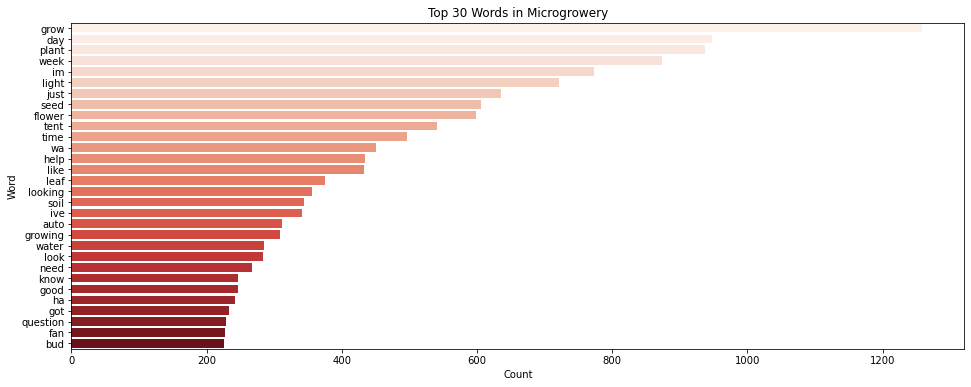

In [246]:
plt.figure(figsize = (16, 6))
sns.barplot(x = 0, y = word_counts_microgrowery.index, data = word_counts_microgrowery, orient = 'h', palette = 'Reds')
plt.title('Top 30 Words in Microgrowery');
plt.xlabel('Count')
plt.ylabel('Word');
plt.savefig('images/top_mg.jpg')
#Unsurprisingly, the most popular word is grow followed by terms related to growing

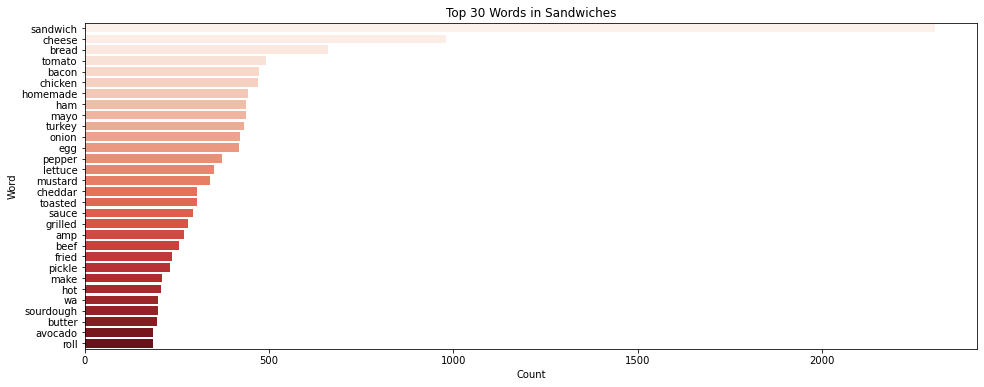

In [247]:
plt.figure(figsize = (16, 6))
sns.barplot(x = 0, y = word_counts_sandwiches.index, data = word_counts_sandwiches, orient = 'h', palette = 'Reds')
plt.title('Top 30 Words in Sandwiches');
plt.xlabel('Count')
plt.ylabel('Word');
plt.savefig('images/top_sw.jpg')
#Unsurprisingly, the most popular word is sandwich followed by ingredients found in sandwiches

In [248]:
#List comprehension that will return all the common words in the top 30

[word for word in word_counts_sandwiches.index if word in word_counts_microgrowery.index]

#Haha, but it's not that helpful

['wa']

## Sentiment Analysis

In [249]:
#Source: https://www.youtube.com/watch?v=kHuAi_gtR-o

analyzer = SentimentIntensityAnalyzer()

In [251]:
microgrowery['polarity_score'] = [analyzer.polarity_scores(box)['compound'] for box in microgrowery['text']]

In [252]:
sandwiches['polarity_score'] = [analyzer.polarity_scores(box)['compound'] for box in sandwiches['text']]

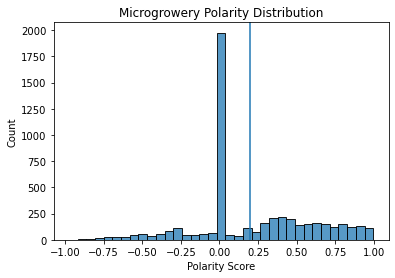

In [255]:
sns.histplot(microgrowery['polarity_score'], palette = 'Reds').axvline(microgrowery['polarity_score'].mean())
plt.title('Microgrowery Polarity Distribution')
plt.xlabel('Polarity Score');
plt.savefig('images/polarity_mg.jpg')

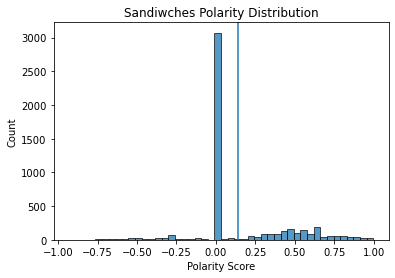

In [256]:
sns.histplot(sandwiches['polarity_score'], palette = 'Reds').axvline(sandwiches['polarity_score'].mean())
plt.title('Sandiwches Polarity Distribution')
plt.xlabel('Polarity Score');
plt.savefig('images/polarity_sw.jpg')

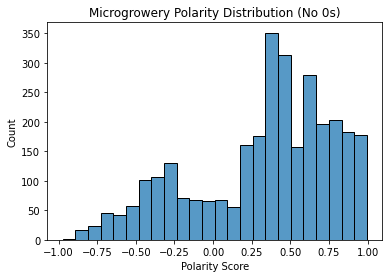

In [257]:
#There are a lot of 0s which makes sense, but I want to see the disributions without
#all of the 0s

sns.histplot(microgrowery[microgrowery['polarity_score'] != 0]['polarity_score'], palette = 'Reds')
plt.title('Microgrowery Polarity Distribution (No 0s)')
plt.xlabel('Polarity Score');

In [84]:
microgrowery[microgrowery['polarity_score'] != 0]['polarity_score'].skew()

-0.6918887471304048

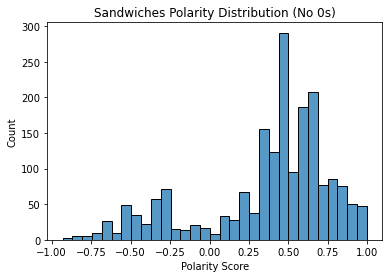

In [85]:
sns.histplot(sandwiches[sandwiches['polarity_score'] != 0]['polarity_score'])
plt.title('Sandwiches Polarity Distribution (No 0s)')
plt.xlabel('Polarity Score');

In [86]:
sandwiches[sandwiches['polarity_score'] != 0]['polarity_score'].skew()

-1.0448371037204927

For both subreddits, the majority of posts fall between 0 and 1.

---

Based on the top word analysis I believe a model will be able to classify reddit posts into the correct subreddit.

## The models

### Splitting data

In [87]:
X = vectorized.drop(columns = 'from_sub')

In [88]:
y = vectorized['from_sub']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### Random Forest

In [100]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)

In [101]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#Score on train set

rf.score(X_train, y_train)

In [102]:
rf.score(X_train, y_train)

0.9148

In [103]:
#Score on test set

rf.score(X_test, y_test)

0.902

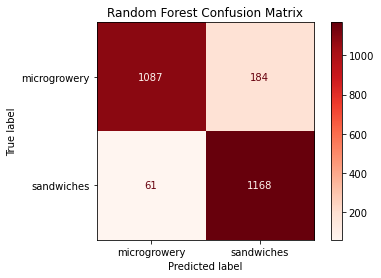

In [112]:
plot_confusion_matrix(rf, X_test, y_test, cmap = 'Reds')
plt.title('Random Forest Confusion Matrix');
plt.savefig('images/rf_confusion.jpg')

This has beaten the baseline, which is 0.5. The only downfall I can think of for this model is that it is potentially overfit due to the very high score on the train set. apart from that, the model is very successful. It has a high accuracy which means it can correctly classify true positives and true negatives. However, it had more trouble classifying posts from r/microgrowery than r/sandwiches.

### KNN

In [90]:
knn = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1)

In [91]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)

In [92]:
y_pred = knn.predict(X_train)

In [93]:
accuracy_score(y_train, y_pred)

0.9244

In [94]:
knn.score(X_test, y_test)

0.8612

In [95]:
confusion_matrix(y_test, knn.predict(X_test))

array([[1249,   22],
       [ 325,  904]], dtype=int64)

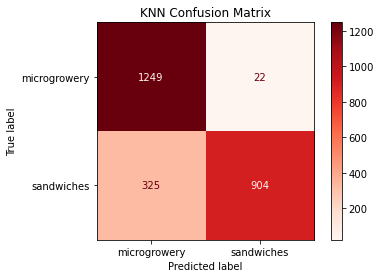

In [258]:
plot_confusion_matrix(knn, X_test, y_test, cmap = 'Reds')
plt.title('KNN Confusion Matrix');
plt.savefig('images/knn_confusion.jpg')

This is also a good model. Although it did not perform as well on the test set as the Random Forest model, it's abilit to classify true positives and negatives is good. This model had more trouble correctly classifying text from r/sandwiches than r/microgrowery which is opposite of the Random Forest model.

---

The model that will be used is the Random Forest model because it has the highest accuracy on the test set and does not seem to be overfit on the train set.

---

## Conclusion

Reccomendation: Because this model IS able to predict, with high accuracy, the classification of subreddit posts based on text, I recommend that reddit employees use this model to assist them in classifying their subreddit posts until they can fix their servers.

To improve this project, I would do a more thorough data clean and train more types of models. Also, I would use pipeline to assist in model testing and data cleaning. Lastly, more computing power would be very nice. It severely limited me in this project.